<a href="https://colab.research.google.com/github/Flyingzaptop/Python-Colab/blob/main/Parquet_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [66]:
df = pd.read_parquet("signal_debug_fold_1.parquet")


In [67]:
df

,epoch,raw_signal,threshold,passed_threshold
0,1,0.551918,0.006,True
1,1,0.549634,0.006,True
2,1,0.532658,0.006,True
3,1,0.523231,0.006,True
4,1,0.481525,0.006,True
...,...,...,...,...
42555,10,-0.467944,0.055,True
42556,10,-0.467419,0.055,True
42557,10,-0.466486,0.055,True
42558,10,-0.466447,0.055,True


# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

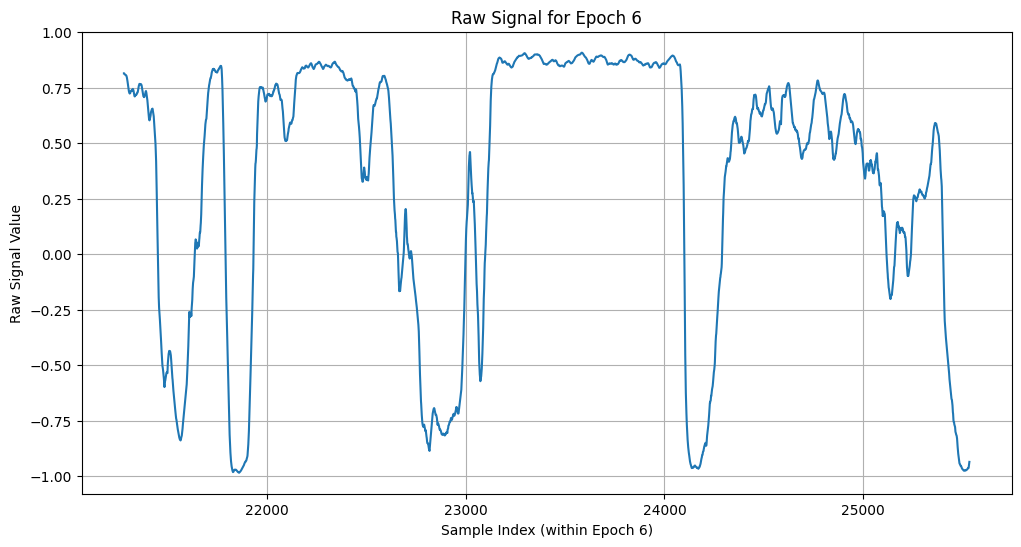

In [79]:
# prompt: create linear plot for raw_signal for only epoch 1.

# Filter the DataFrame for epoch 1
df_epoch_1 = df[df['epoch'] == 6]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_epoch_1['raw_signal'])
plt.xlabel('Sample Index (within Epoch 6)')
plt.ylabel('Raw Signal Value')
plt.title('Raw Signal for Epoch 6')
plt.grid(True)
plt.show()

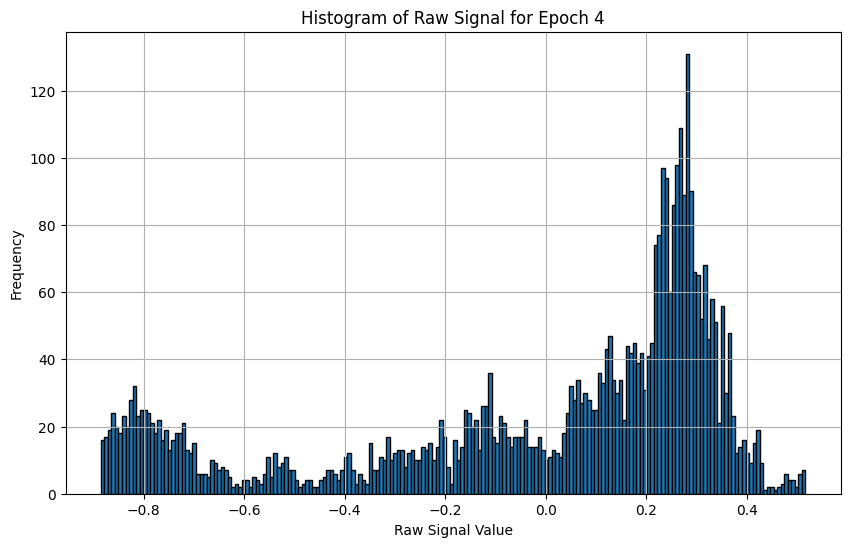

In [74]:
# prompt: create histogram quanity plot for raw_signal for only epoch 1

plt.figure(figsize=(10, 6))
plt.hist(df_epoch_1['raw_signal'], bins = 200, edgecolor='black')
plt.xlabel('Raw Signal Value')
plt.ylabel('Frequency')
plt.title('Histogram of Raw Signal for Epoch 4')
plt.grid(True)
plt.show()

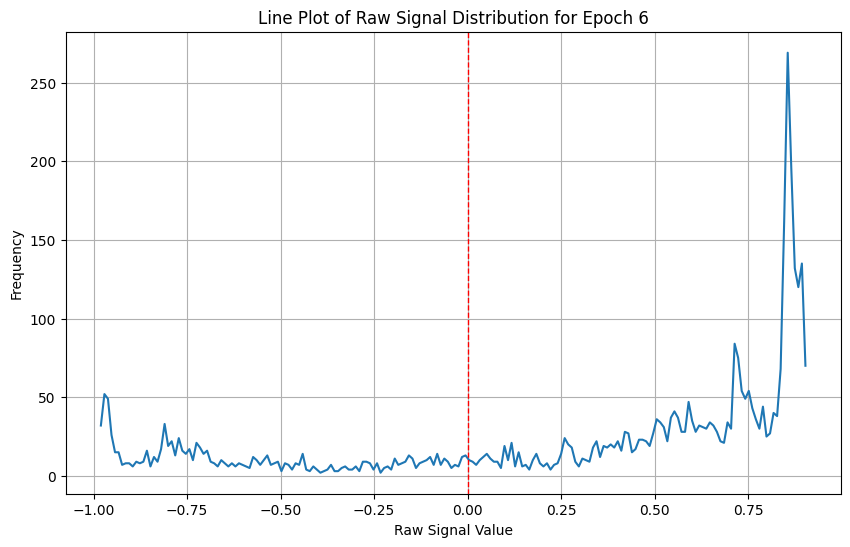

In [62]:
# prompt: look previous histogram code and now generate plot, that will do same, but not with bars - only line, that goes from bar's top to another. Without points - pure line and vertical line in zero

# Calculate the histogram data
hist, bin_edges = np.histogram(df_epoch_1['raw_signal'], bins=200)

# Calculate the centers of the bins
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(10, 6))
# Plot the line graph
plt.plot(bin_centers, hist)

# Add a vertical line at x=0
plt.axvline(x=0, color='r', linestyle='--', linewidth=1)

plt.xlabel('Raw Signal Value')
plt.ylabel('Frequency')
plt.title('Line Plot of Raw Signal Distribution for Epoch 6')
plt.grid(True)
plt.show()


IndexError: list index out of range

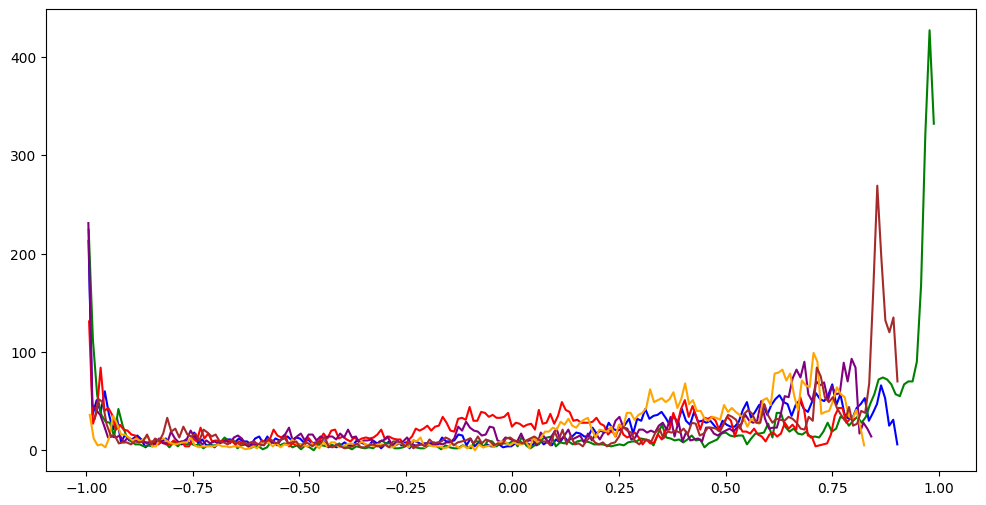

In [64]:
# prompt: ok, now make same graph as last one (quantity histogram, but with lines), but combine all 6 epochs in one plot - just draw their lines with different colors

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for epoch in range(1, 9):
    df_epoch = df[df['epoch'] == epoch]
    hist, bin_edges = np.histogram(df_epoch['raw_signal'], bins=200)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, hist, color=colors[epoch-1], label=f'Epoch {epoch}')

plt.axvline(x=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Raw Signal Value')
plt.ylabel('Frequency')
plt.title('Line Plot of Raw Signal Distribution for all Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df.isna().sum()

,0
age,0
bmi,0
children,0
expenses,0


# Завдання 2
Розділіть дані на залежну y(`expenses`) та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [ ]:
df.corr(method = 'pearson')

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: xlabel='age', ylabel='expenses'>

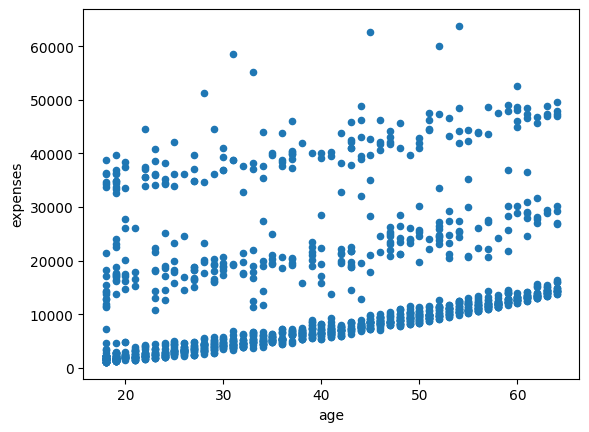

In [ ]:
df.plot.scatter(x='age', y='expenses')

In [ ]:
y = df['expenses']
X = df.drop('expenses',axis =1)
X = X.drop('children',axis =1)
X = X.drop('bmi',axis =1)


In [ ]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [ ]:
X

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
X_train

,age
560,46
1285,47
1142,52
969,39
486,54
...,...
1095,18
1130,39
1294,58
860,37


# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([240.59656289])

In [ ]:
model.intercept_

3876.9286950300375

In [ ]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name = "model" ):
  df = pd.DataFrame()
  df.loc["MAE",name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE",name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE",name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2",name] = metrics.r2_score(y_true, y_pred)
  return df.round(2)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([14703.77402497, 12538.40495898, 19275.10871983, 14944.37058785,
        8448.26338989, 12057.2118332 ,  8448.26338989, 19275.10871983,
       10613.63245588, 15666.16027652, 11094.82558165, 13741.38777342,
       10854.22901877, 14944.37058785, 18312.72246828, 15184.96715074,
       15666.16027652, 15184.96715074, 14944.37058785, 14222.58089919,
        9891.84276722, 14222.58089919,  8448.26338989,  9170.05307855,
       15906.7568394 , 16869.14309095, 18312.72246828, 10373.03589299,
       15184.96715074,  8207.666827  , 13500.79121053, 17590.93277962,
        8929.45651567, 11094.82558165, 10132.4393301 , 14703.77402497,
        8929.45651567, 14222.58089919, 16387.94996518, 12538.40495898,
        8448.26338989,  9170.05307855, 17350.33621673, 18072.12590539,
       11816.61527032, 18072.12590539,  8929.45651567,  9891.84276722,
       14222.58089919, 11335.42214454, 19034.51215694,  8207.666827  ,
       13500.79121053,  8207.666827  , 17350.33621673, 15906.7568394 ,
      

In [ ]:
y_train

,expenses
560,9193.84
1285,8534.67
1142,27117.99
969,8596.83
486,12475.35
...,...
1095,4561.19
1130,8582.30
1294,11931.13
860,46113.51


In [ ]:
all_metrics = pd.DataFrame()
all_metrics['train'] = get_metrics(y_train, model.predict(X_train))
all_metrics['test'] = get_metrics(y_test, y_pred)
all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))
all_metrics

<ipython-input-171-c558eb55f6f1>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))


,train,test
MAE,890.34,884.35
MSE,13458106.77,13459559.84
RMSE,1160.09,1160.15
R2,0.01,0.01


Якось не дуже xD. Я вибрав стовпчики з найбільшою корреляцією 0.3. Може щось десь наплутав. R2 виглядає дуже погано, хоча інші метрики хороші

# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [ ]:
#expences = 240.597 * age + 3876.929

# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат. Розгляньте один з варіантів:
* видалення викидів по стовпчику `expenses`
* видалення викидів по всіх стовпчиків

<Axes: xlabel='age', ylabel='expenses'>

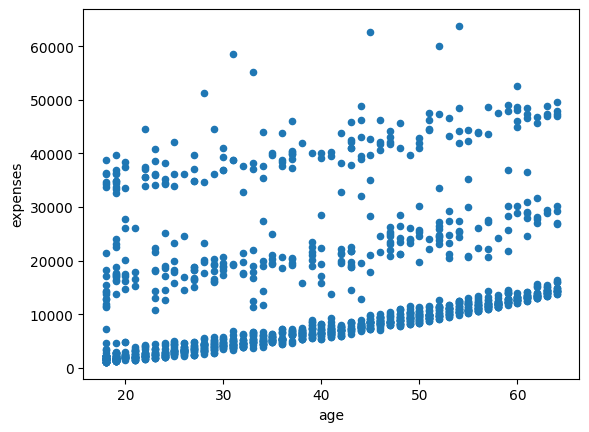

In [ ]:
df.plot.scatter(x='age', y='expenses')

<Axes: >

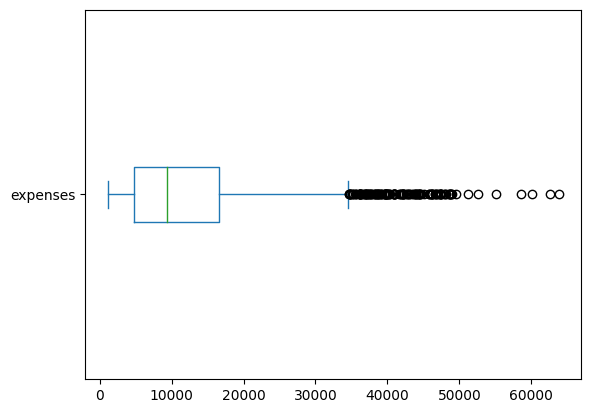

In [ ]:
df.plot.box(column='expenses',vert = False)

<Axes: >

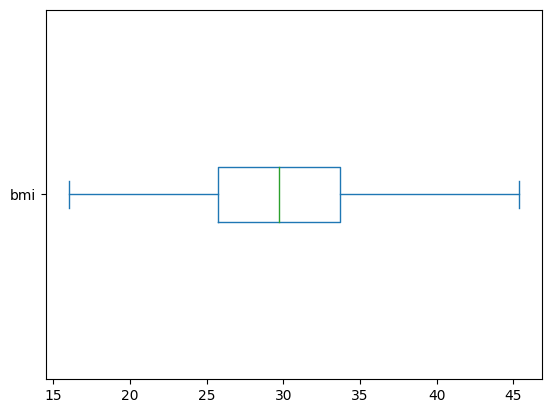

In [ ]:
df.plot.box(column='bmi',vert = False)

In [ ]:
q1 = df['expenses'].quantile(0.25)
q3 = df['expenses'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df = df[(df['expenses'] > lower) & (df['expenses'] < upper)]

In [ ]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df = df[(df['bmi'] > lower) & (df['bmi'] < upper)]

<Axes: >

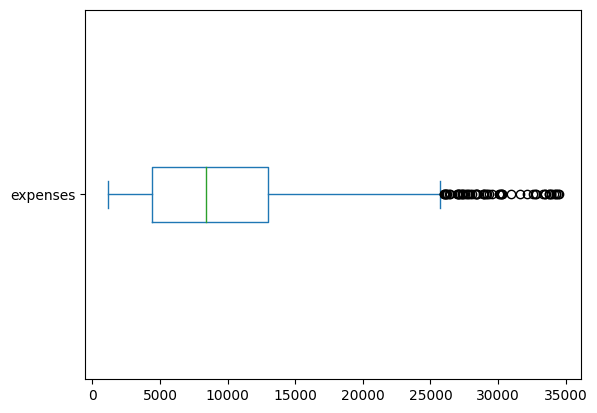

In [ ]:
df.plot.box(column='expenses',vert = False)

<Axes: >

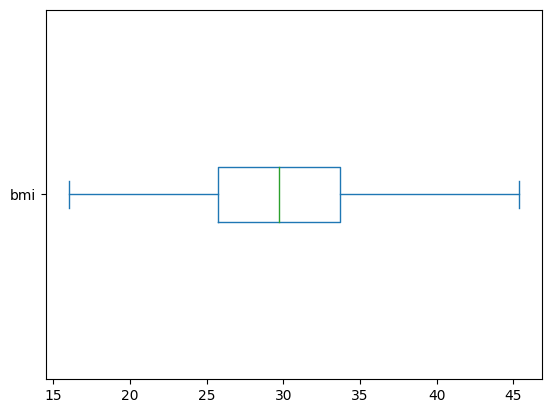

In [ ]:
df.plot.box(column='bmi',vert = False)

In [ ]:
df.corr(method = 'pearson')

,age,bmi,children,expenses
age,1.000000,0.124802,0.038125,0.435942
bmi,0.124802,1.000000,-0.010185,-0.056684
children,0.038125,-0.010185,1.000000,0.084167
expenses,0.435942,-0.056684,0.084167,1.000000


По корреляції витрат і віку трохи краще. вже майже 0.45

In [ ]:
y = df['expenses']
X = df.drop('expenses',axis =1)
X = X.drop('children',axis =1)
X = X.drop('bmi',axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([15666.16027652,  8929.45651567,  8207.666827  , 11094.82558165,
       13741.38777342, 14703.77402497,  8207.666827  , 15425.56371363,
        8207.666827  , 14463.17746208,  9651.24620433, 14222.58089919,
       15184.96715074,  8929.45651567,  9170.05307855, 17350.33621673,
       16387.94996518, 17350.33621673, 13260.19464764, 17831.5293425 ,
       17109.73965384, 17590.93277962, 18312.72246828, 13981.9843363 ,
       16628.54652807, 18312.72246828, 12538.40495898, 15906.7568394 ,
       12538.40495898, 15666.16027652,  9170.05307855, 10613.63245588,
       11094.82558165, 18793.91559405, 13260.19464764, 19034.51215694,
        8207.666827  , 14944.37058785, 19275.10871983,  8207.666827  ,
       17590.93277962, 11335.42214454, 10854.22901877, 16869.14309095,
        9170.05307855, 14222.58089919, 17109.73965384, 14703.77402497,
       14703.77402497, 11576.01870743, 16147.35340229, 14463.17746208,
       15425.56371363, 17831.5293425 , 18072.12590539, 18553.31903117,
      

In [ ]:
all_metrics = pd.DataFrame()
all_metrics['train'] = get_metrics(y_train, model.predict(X_train))
all_metrics['test'] = get_metrics(y_test, y_pred)
all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))
all_metrics

<ipython-input-207-c558eb55f6f1>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_metrics = all_metrics.applymap(lambda x: round(x / 10, 2))


,train,test
MAE,681.73,692.85
MSE,5294992.11,5633599.43
RMSE,727.67,750.57
R2,-0.00,-0.00


Диво дивне XD